## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

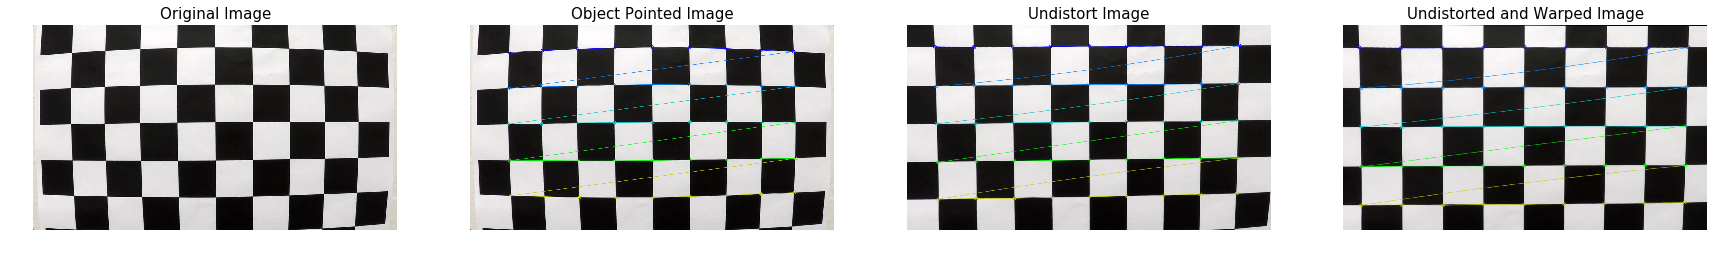

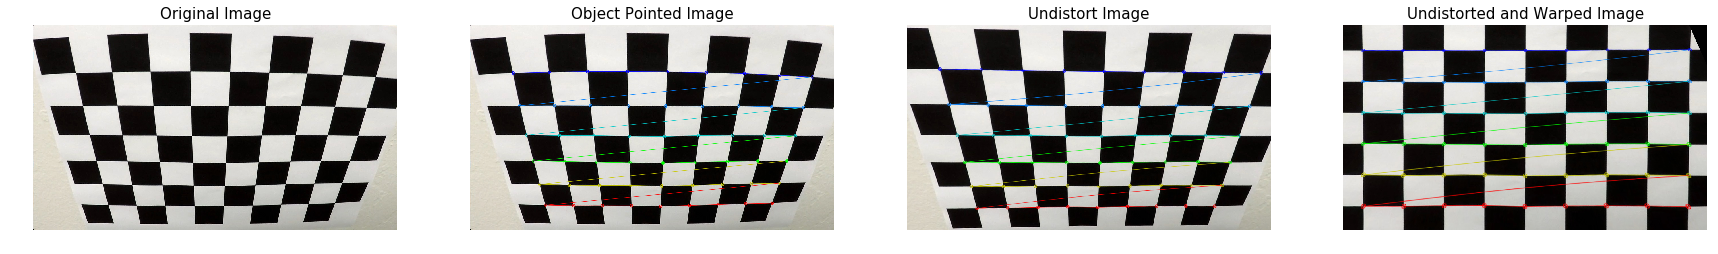

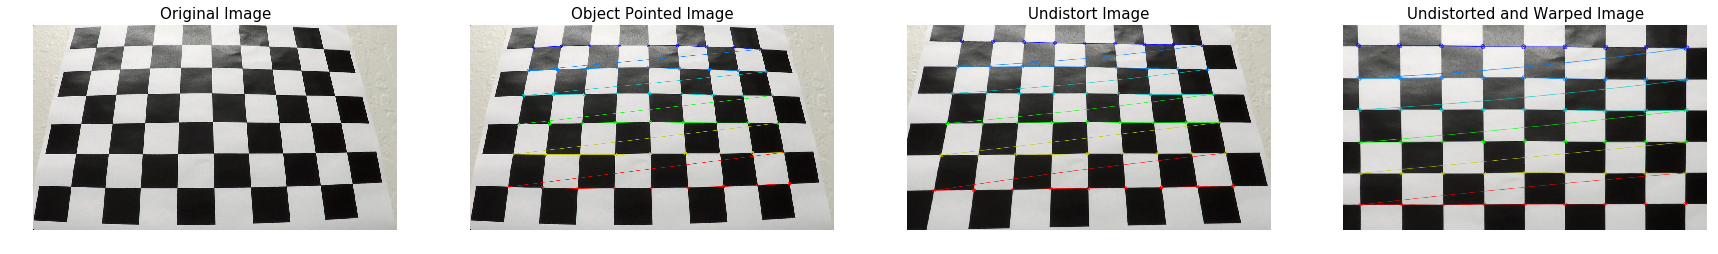

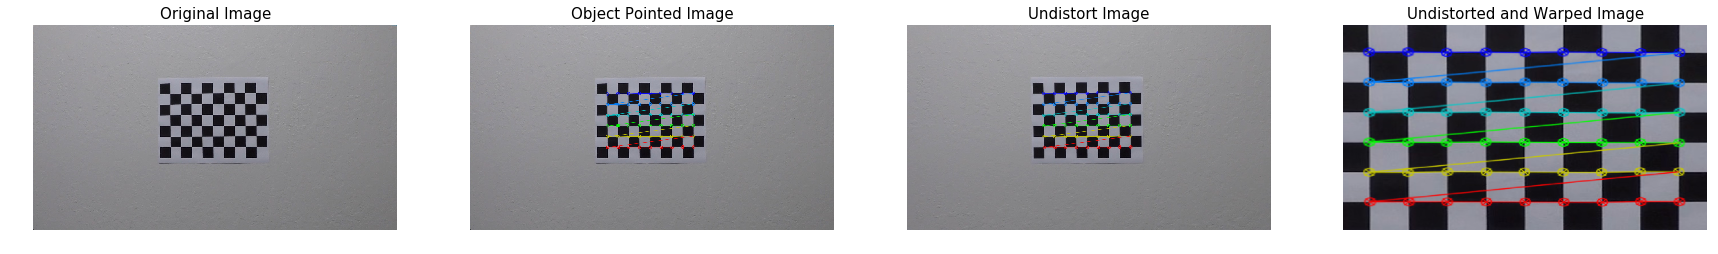

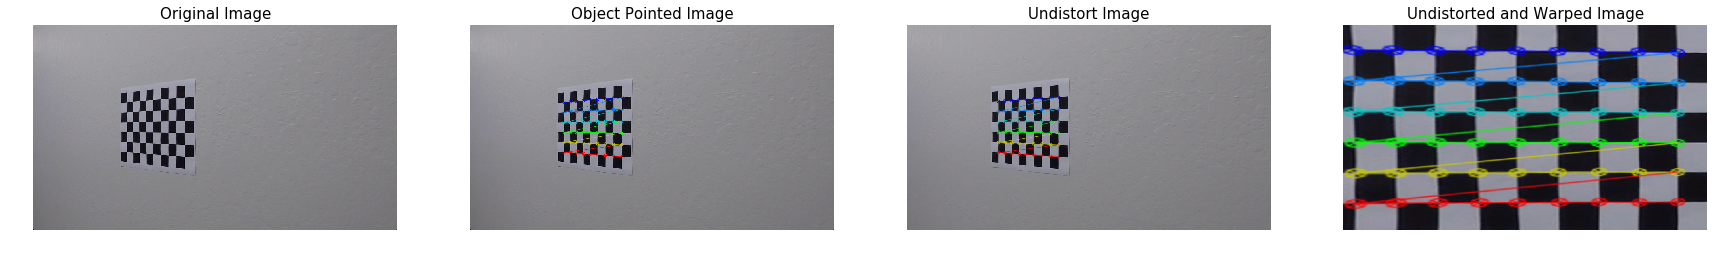

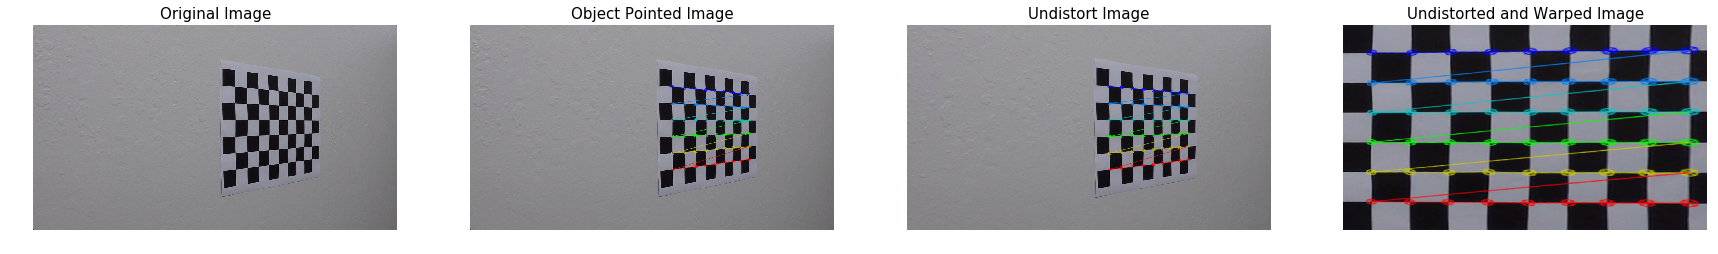

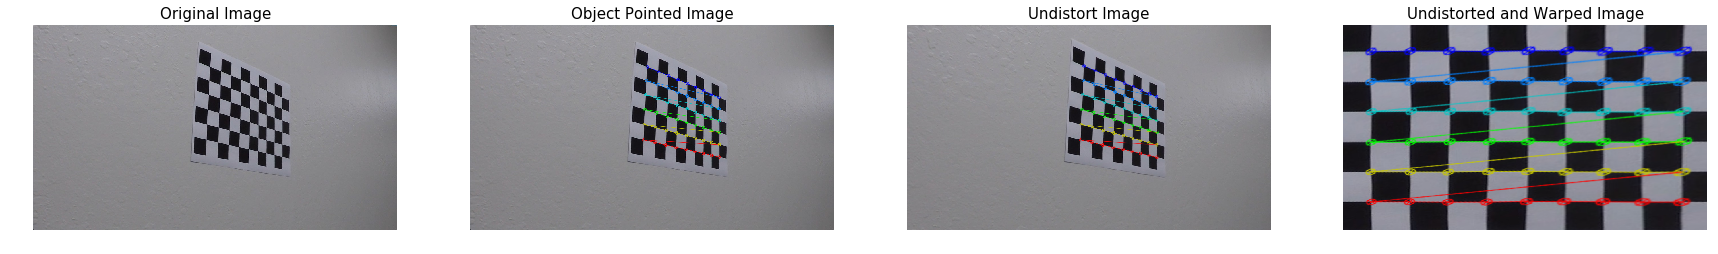

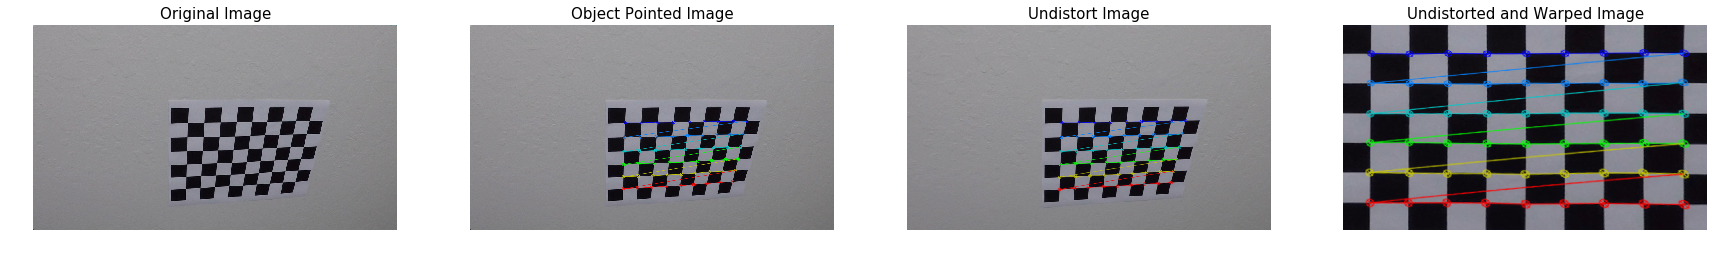

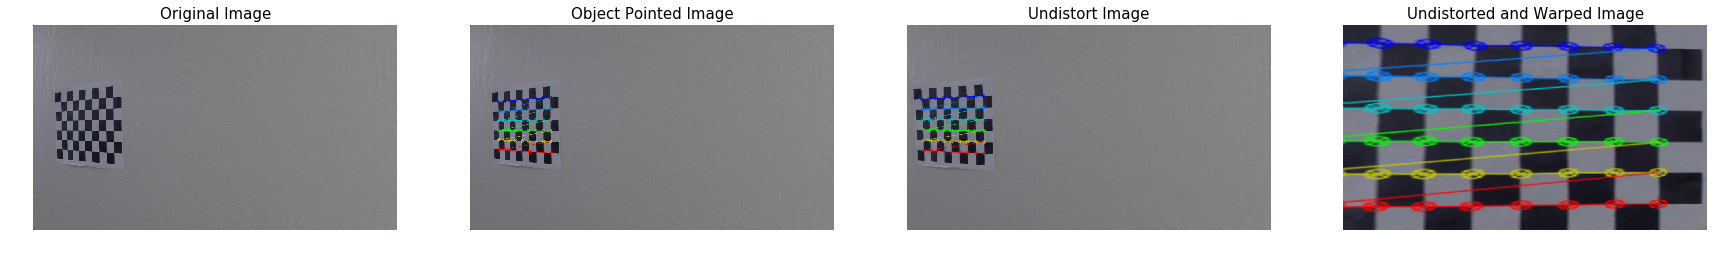

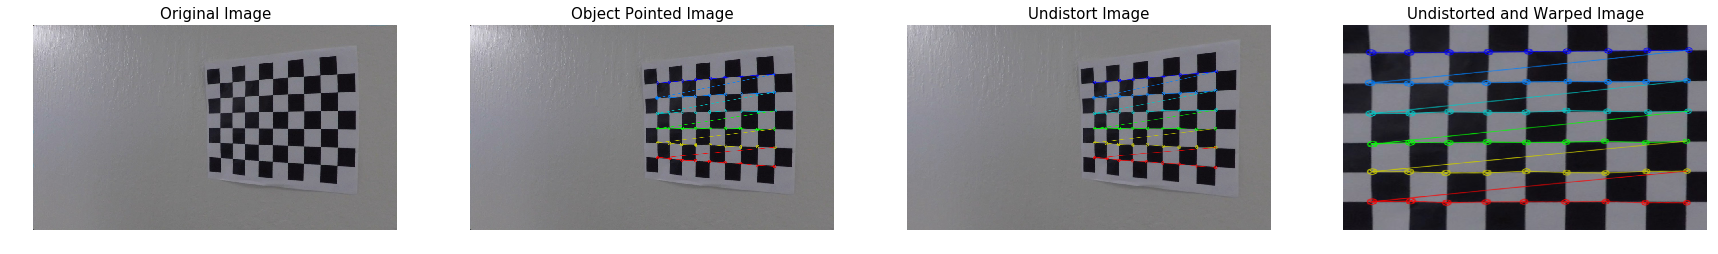

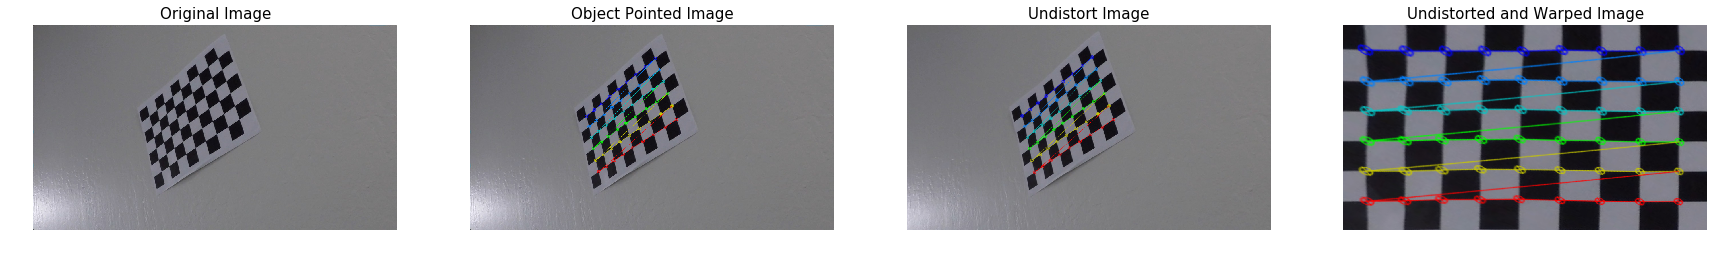

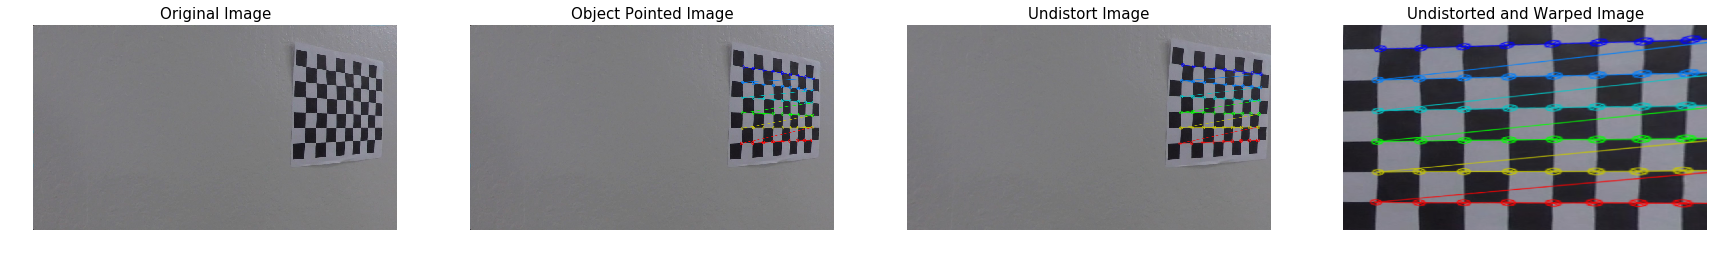

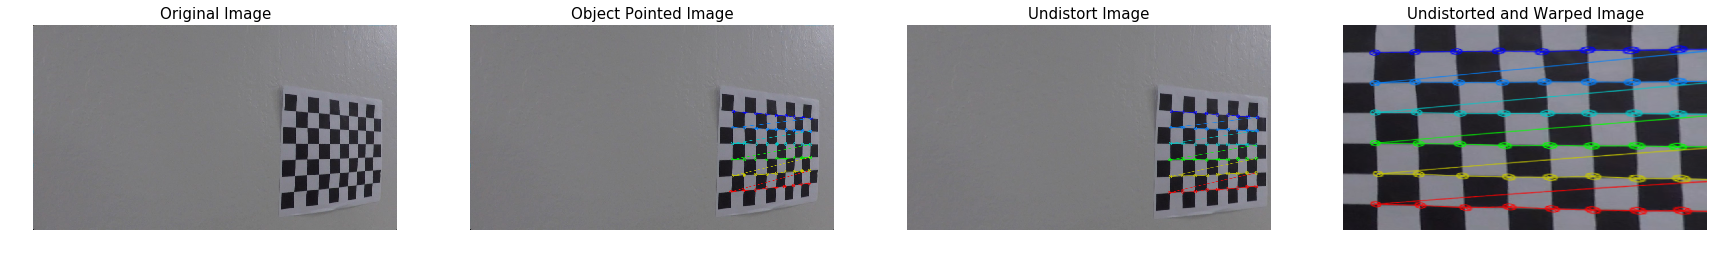

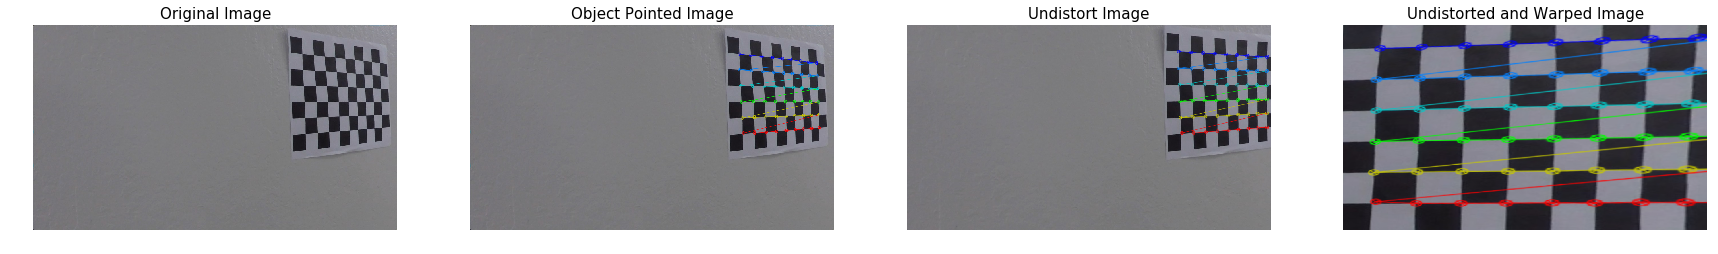

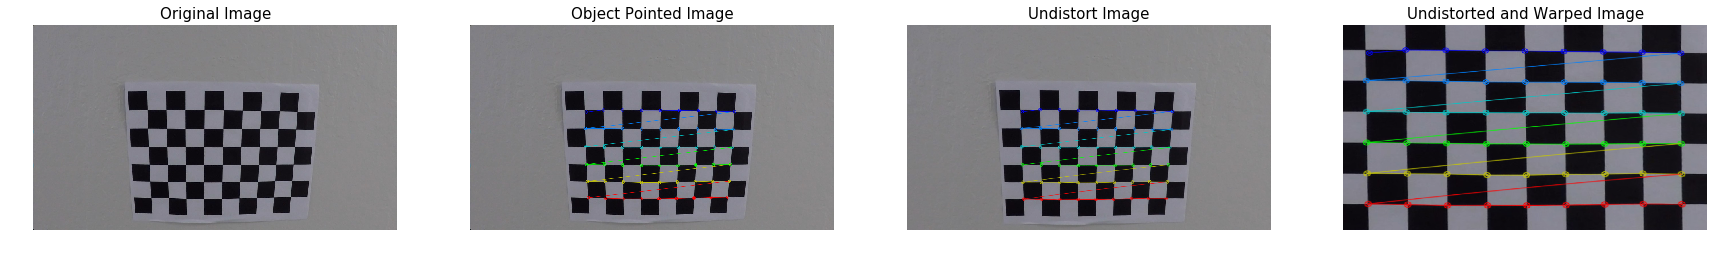

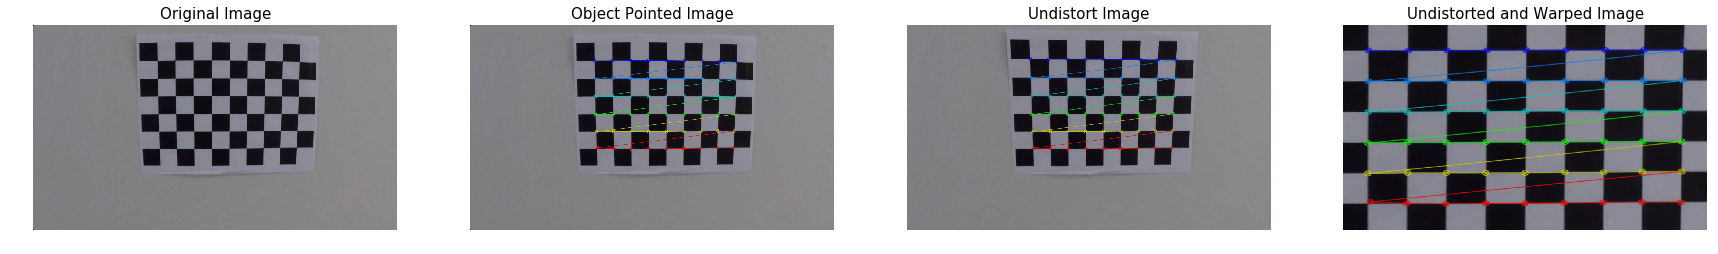

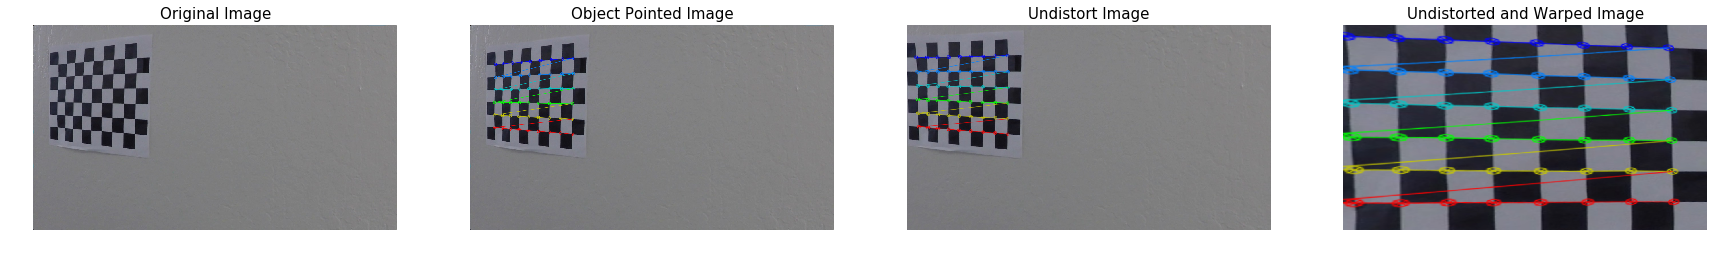

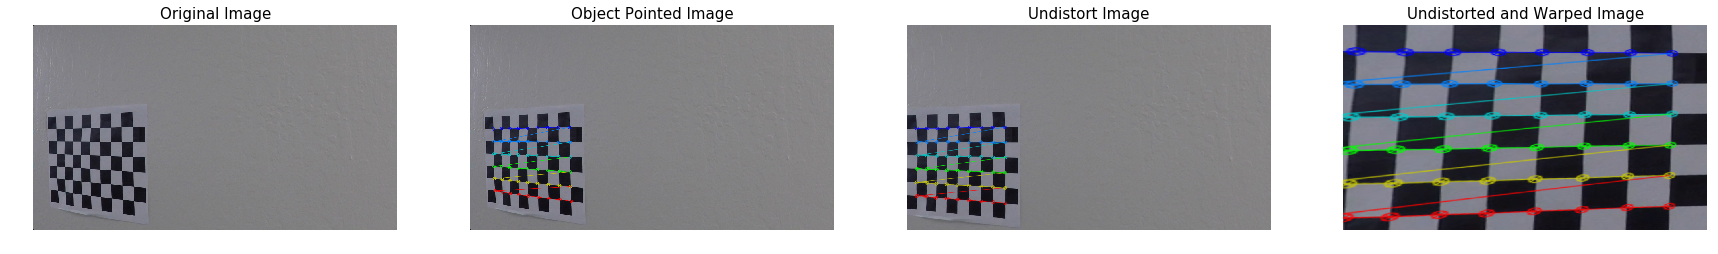

In [2]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
%matplotlib inline

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Step through the list and search for chessboard corners
for i in range(1,21):
    img = mpimg.imread('camera_cal/calibration{}.jpg'.format(i))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    nx= 9
    ny = 5 if i == 1 else 6
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(30,10))
        ax1.imshow(img)
        ax1.axis('off')
        ax1.set_title('Original Image', fontsize=15)
        
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        #write_name = 'calibration_output/calibration{}.jpg'.format(i)
        #cv2.imwrite(write_name, img)
        
        ax2.imshow(img)
        ax2.axis('off')
        ax2.set_title('Object Pointed Image', fontsize=15)
        img_size = (img.shape[1], img.shape[0])

        # Do camera calibration given object points and image points
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
        undist = cv2.undistort(img, mtx, dist, None, mtx)
        ax3.imshow(undist)
        ax3.axis('off')
        ax3.set_title('Undistort Image', fontsize=15)
        offset = 100
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
  
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(undist, M, img_size)
        
        ax4.imshow(warped)
        ax4.axis('off')
        ax4.set_title('Undistorted and Warped Image', fontsize=15)
        
        #dist_pickle = {}
        #dist_pickle["mtx"] = mtx
        #dist_pickle["dist"] = dist
        #pickle.dump( dist_pickle, open( "wide_dist_pickle.p", "wb" ) )